<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0722_52%EC%9D%BC%EC%B0%A8_ML%5Bsantandar%2C%EB%8B%A8%EC%9D%BC_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!ls drive/MyDrive

'이력 파일'		     __pycache__
'공통프로젝트(2022.06~07)'   sample_weight.pkl
 cnn_cats_dogs_aug.h5	     santander-customer-satisfaction.zip
'Colab Notebooks'	     t10k-images-idx3-ubyte.gz
 data			     t10k-labels-idx1-ubyte.gz
 diabetes.csv		     titanic_train.csv
 history_dict_aug.pkl	     train_1.zip
 history_plot.py	     train-images-idx3-ubyte.gz
 loss_acc_plot.png	     train-labels-idx1-ubyte.gz
 mnist.pkl		     train.zip
 mnist.py		     UCI_HAR_Dataset.zip
 nooriho.jpg		     Web_Portfolio
 otto_train.csv		     wind_data.txt
'ppt 양식'


In [9]:
!cp drive/MyDrive/santander-customer-satisfaction.zip .

In [10]:
!unzip santander-customer-satisfaction.zip

Archive:  santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
pd.options.display.max_info_columns=1000

In [14]:
df = pd.read_csv('./train.csv', encoding='latin-1' )

In [19]:
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [16]:
df.shape

(76020, 371)

In [17]:
df.TARGET.value_counts() #0 만족 1 불만족

0    73012
1     3008
Name: TARGET, dtype: int64

In [18]:
df[df['var3']<0]['var3'].value_counts()

-999999    116
Name: var3, dtype: int64

분류기 : decisiontree, randomforest

평가 : roc-acc(proba 필요) , accuracy, GridSearchCV

#1 
데이터 전처리

In [21]:
#ID drop
df = df.drop('ID', axis=1)

In [22]:
df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [26]:
#-999999를 제일 평균적으로 많이 쓰인 2로 대체
df['var3'].replace(-999999, 2, inplace=True)

In [27]:
X_features = df.iloc[:, :-1]  #target을 제외한 var 값들
y_labels = df.iloc[:, -1] #target
print(f'피처 데이터 shape: {X_features.shape}')

피처 데이터 shape: (76020, 369)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습 세트 shape: {X_train.shape}, 테스트 세트 shape: {X_test.shape}')
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 데이터 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape: (60816, 369), 테스트 세트 shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 데이터 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


#2.필요한 라이브러리 불러오기

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#3. DecisionTreeClassifier 로 모델 훈련하기

In [33]:
dt_clf =DecisionTreeClassifier(random_state=156)

In [34]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [35]:
pred = dt_clf.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.9250
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


#4. GridSearchCV 로 정확도 평가

In [37]:
#파라미터에 max_depth를 줘서 GridSearchCV  정확도 및 최적의 하이퍼 파라미터 찾기
params = {'max_depth' : [6,8,10,12,16,20,24]}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.9604
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 6}


In [38]:
#max_depth, min child weight, colsample bytree를 활용해 GridSearchCV찾기
dt_clf =DecisionTreeClassifier(random_state=156)

params = {'max_depth': [5, 7],
         'min_child_weight': [1, 3],
         'colsample_bytree': [0.5, 0.75]}
gridcv = GridSearchCV(dt_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print(f'GridSearchCV 최적 파라미터: {gridcv.best_params_}')


ValueError: ignored

In [ ]:
dt_clf_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print(f'DecissionTreClassifier : {np.round(dt_clf_score, 4)}')

#RandomForest

In [49]:
rf_clf = RandomForestClassifier(random_state=156)

In [41]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도 :0.9521


In [47]:
params = {
    'n_estimators' : [100, 200, 300],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [8, 16, 20]
}

In [50]:
grid_tree = GridSearchCV(rf_clf, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_test)
accuracy_score(y_test, pred)

best parameters :  {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 100}
best score :  0.9609971060247303


0.9582346750855039

#단일 선형 회귀

단일 회귀 (simple linear regression)

$$
w_0 + w_1 \times x_1
$$

다중 회귀 (multiple linear regression)

$$
w_0 + w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n
$$


다항 회귀 (polynomial regression)

$$
w_0 + w_1 × x_1 + w_2 \times {x {2 \over 2}} + .... + w_n \times x {n \over n}
$$

In [51]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data = {'x':[13,19,16,14,15,14],
        'y':[40,83,62,48,58,43]}

In [53]:
data = pd.DataFrame(data)

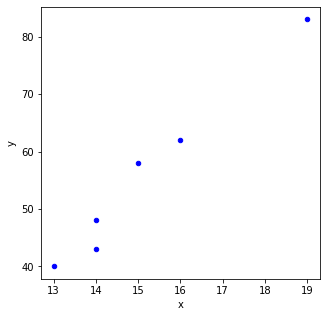

In [54]:
data.plot(kind='scatter',
          x= 'x',
          y = 'y',
          figsize=(5,5),
          color='b')

In [55]:
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [56]:
y = data.y

In [57]:
X = data.x

In [61]:
X.shape, y.shape

((6,), (6,))

In [69]:
np.expand_dims(X, axis=1)

array([[13],
       [19],
       [16],
       [14],
       [15],
       [14]])

In [72]:
X= X[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [73]:
lr = linear_model.LinearRegression()
lr.fit(X,data.y)

LinearRegression()

In [74]:
lr.intercept_

-55.48175182481753

In [75]:
lr.coef_

array([7.32846715])

In [76]:
pred = lr.predict(X)

In [77]:
pred

array([39.78832117, 83.75912409, 61.77372263, 47.11678832, 54.44525547,
       47.11678832])

In [78]:
residuals = data['y'] - pred

In [79]:
residuals #잔차 실제값 - 예측값 뺀 값

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64

In [81]:
for i in range(len(residuals)):
  print(data['y'][i], '-', np.round(pred[i], 2), '=', np.round(residuals[i],2))

40 - 39.79 = 0.21
83 - 83.76 = -0.76
62 - 61.77 = 0.23
48 - 47.12 = 0.88
58 - 54.45 = 3.55
43 - 47.12 = -4.12


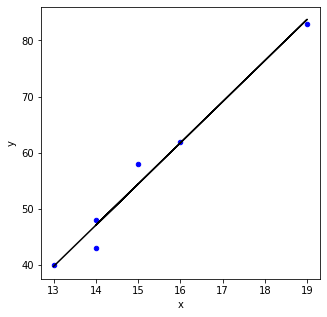

In [83]:
data.plot(kind='scatter',
          x= 'x',
          y = 'y',
          figsize=(5,5),
          color='b')
plt.plot(data.x , pred, color='black')

In [84]:
a = lr.coef_
b = lr.intercept_

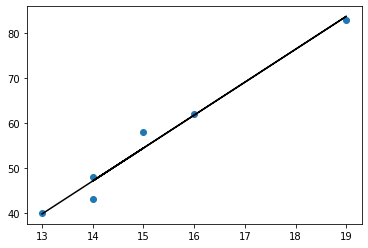

In [85]:
plt.scatter(data.x, data.y)
plt.plot(data.x, a*data.x + b, 'k')

totla sum of sqares (TSS)  = explained sum of squares (ESS) + residual sum of sqares ( RSS)


총 제곱 합 (TSS) = 실제값 y 가 y 평균으로부터 멀어진 정도 (residual)

설명된 제곱합 (ESS) = 예측값과 y평균의 차이의 제곱 합

잔차제곱합 (RSS) = 예측값과 실제값의 차이의 제곱합

결정계수 값이 결정계수 (R-Square) 가 1일인 경우는 RSS =0이므로 예측값과 실제값의 차이가 없는 완전히 잘 맞는 경우에 해당

r**2 값은 이 직선의 데이터들을 설명하는 정도